In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
# Parameters of model
lr = 1
n_input = 8
n_hidden = 3
n_output = 1

In [140]:
# Random data generation with 0s and 1s
data = np.random.randint(0,2, size=(8,8))
print(data)

[[0 1 1 1 1 0 1 1]
 [0 1 0 1 1 1 0 1]
 [0 0 1 1 1 0 0 0]
 [1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 0 0]
 [0 0 1 0 1 0 1 1]
 [0 1 0 0 1 0 1 0]
 [1 1 0 1 0 0 1 1]]


In [141]:
# Calculating desired output
x = []
y = []
for i in range(8):
  for j in data[:,i]:
    x.append(j)
  x = np.array(x)
  count = np.count_nonzero(x==1)
  x = []
  if count%2==0:
    y.append(1)
  else:
    y.append(0)


In [142]:
x = data.T
y_desired = np.array(y)
y_desired = y_desired.reshape(8,1)

In [143]:
input_size = n_input
hidden_size = n_hidden
output_size = n_output

# create the weight matrices with random weights between -0.5 and 0.5
w_fg = np.random.uniform(low=-0.5, high=0.5, size=(input_size, hidden_size))
w_gh = np.random.uniform(low=-0.5, high=0.5, size=(hidden_size, output_size))

In [144]:
# Defining activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [145]:
# set up the learning rate and number of epochs
learning_rate = lr
num_epochs = 0
sse_list = []
y_list = []
# iterate the model until convergence or max epochs
while True:
    # forward pass: compute the output of the model
    hidden_activations = np.dot(x, w_fg)
    hidden_output = sigmoid(hidden_activations)
    y = np.dot(hidden_output, w_gh)
    y = sigmoid(y)

    # compute the sum of squared error between observed and desired output
    error = y_desired - y
    sse = np.sum(error ** 2)
    sse_list.append(sse)

    # print a report every 10 epochs
    if num_epochs % 10 == 0:
        print(f"Epoch {num_epochs}: SSE = {sse}")

    # check convergence condition and exit loop if satisfied
    if sse < 0.01 or num_epochs > 1000:
        break

    # backward pass: update the weights of the model
    delta_y = -error
    delta_w_gh = np.dot(hidden_output.T, delta_y)
    delta_hidden_output = np.dot(delta_y, w_gh.T)
    delta_hidden_activations = delta_hidden_output * hidden_output * (1 - hidden_output)
    delta_w_fg = np.dot(x.T, delta_hidden_activations)

    # update the weights with the computed deltas
    w_gh -= learning_rate * delta_w_gh
    w_fg -= learning_rate * delta_w_fg

    # increment the number of epochs
    num_epochs += 1

# print the final output and number of epochs
print("Predicted output:", y.flatten())
print("Actual Output", y_desired.flatten())
accuracy = np.mean((y > 0.5) == y_desired)
print('Accuracy: ', accuracy)
print("Number of epochs:", num_epochs)

Epoch 0: SSE = 2.2375727380437076
Epoch 10: SSE = 0.5555904525562494
Epoch 20: SSE = 0.017685907503812652
Predicted output: [0.04716742 0.99030683 0.03988415 0.95529438 0.99533494 0.98851376
 0.96957213 0.05378132]
Actual Output [0 1 0 1 1 1 1 0]
Accuracy:  1.0
Number of epochs: 23


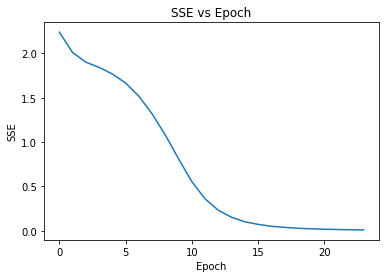

In [146]:
if sse < 0.01:
  # create a plot of SSE as it changes over epochs
  plt.plot(sse_list)
  plt.xlabel("Epoch")
  plt.ylabel("SSE")
  plt.title("SSE vs Epoch")
  plt.show()

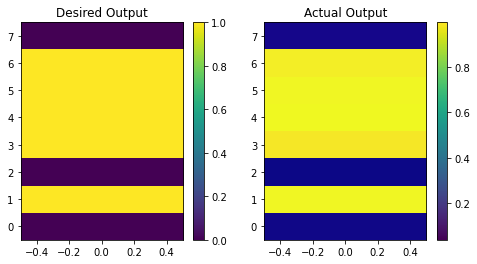

In [147]:
# We are using imshow function in Matplotlib to produce a plot similar to MATLAB's imagesc
if sse < 0.01:
  # Create a 1x2 subplot grid
  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  # Create a heatmap of the array using imshow
  plt.imshow(y, cmap='viridis', origin='lower', aspect='auto', interpolation='nearest')

  # Plot the first image in the left subplot
  axs[0].imshow(y_desired, cmap='viridis', origin='lower', aspect='auto', interpolation='nearest')
  axs[0].set_title('Desired Output')

  # Plot the second image in the right subplot
  axs[1].imshow(y, cmap='plasma', origin='lower', aspect='auto', interpolation='nearest')
  axs[1].set_title('Actual Output')

  # Add a colorbar to each subplot to show the mapping between values and colors
  for ax in axs:
      cbar = ax.figure.colorbar(ax.images[0], ax=ax)

  # Show the plot
  plt.show()

# Testing Phase

In [148]:
# Random data generation with 0s and 1s
data = np.random.randint(0,2, size=(8,8))
print(data)

# Calculating desired output
x = []
y = []
for i in range(8):
  for j in data[:,i]:
    x.append(j)
  x = np.array(x)
  count = np.count_nonzero(x==1)
  x = []
  if count%2==0:
    y.append(1)
  else:
    y.append(0)


x_test = data.T
y_desired = np.array(y)
y_desired = y_desired.reshape(8,1)

sse_list = []
def forward(X, W1, W2):
    hidden = sigmoid(np.dot(X, W1))
    output = sigmoid(np.dot(hidden, W2))
    error = y_desired - output
    sse = np.sum(error ** 2)
    sse_list.append(sse)
    return output

# Test the model on the testing data
Y_pred_test = forward(x_test, w_fg, w_gh)
print("Predicted values: ", Y_pred_test.flatten())
print("True values: ", y_desired.flatten())
print("Sum of squared Error: ", sse_list)

accuracy = np.mean((Y_pred_test > 0.5) == y_desired)
print("Accuracy: ", accuracy)


[[0 0 0 0 1 1 1 1]
 [1 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 0]
 [0 0 0 0 1 1 1 0]
 [0 1 1 1 1 1 0 1]
 [1 0 0 0 0 1 0 0]
 [0 0 1 1 1 0 0 0]
 [0 1 0 1 0 1 1 0]]
Predicted values:  [0.7003664  0.89735913 0.99579686 0.99575484 0.90767253 0.02302726
 0.88470393 0.99129447]
True values:  [1 1 1 0 1 0 0 0]
Sum of squared Error:  [2.866281197451599]
Accuracy:  0.625


In [149]:
''' 
    For some testing data we are able to get around 75%-80% accuracy 
    which shows that the model is able to generalize well
'''

' \n    For some testing data we are able to get around 75%-80% accuracy \n    which shows that the model is able to generalize well\n'